In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import scipy.stats as st

In [2]:
path = 'EmployeeAttrition.csv'
df = pd.read_csv(path)
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2


In [3]:
# Create separate dfs for each designation

des1_df = df.loc[df['Designation']==1,:]
des2_df = df.loc[df['Designation']==2,:]
des3_df = df.loc[df['Designation']==3,:]
des4_df = df.loc[df['Designation']==4,:]
des5_df = df.loc[df['Designation']==5,:]
des1_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
10,2016-01-01,5,29,Male,C9,College,46368,2016-01-09,NaN,1,1,0,1
11,2016-02-01,5,29,Male,C9,College,46368,2016-01-09,NaN,1,1,120360,1


In [4]:
# group dfs by quartley rating and get mean total business value
# eg. level 4 should make x amount to receive high rating
pd.options.display.float_format = '{:.2f}'.format
d1_gr = des1_df.groupby('Quarterly Rating')['Total Business Value'].mean()
d2_gr = des2_df.groupby('Quarterly Rating')['Total Business Value'].mean()
d3_gr = des3_df.groupby('Quarterly Rating')['Total Business Value'].mean()
d4_gr = des4_df.groupby('Quarterly Rating')['Total Business Value'].mean()
d5_gr = des5_df.groupby('Quarterly Rating')['Total Business Value'].mean()
print(d1_gr)


Quarterly Rating
1     48940.26
2    309147.31
3    583645.68
4   1265602.71
Name: Total Business Value, dtype: float64


In [ ]:
all_df = df.groupby(['Designation','Quarterly Rating'])['Total Business Value'].mean().unstack('Quarterly Rating')
all_df

In [ ]:

rating = range(1,5,1)
fig_2 = all_df.plot.bar(x='Designation', rot=20, figsize = (10,5), width = 0.5)
plt.show()


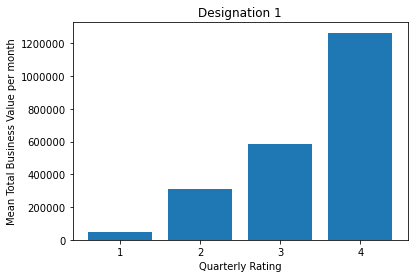

In [5]:
# pd.options.display.float_format = '{:.2f}'.format
# Why won't this display the correct values on y axis? They are printed correctly above.

# Fig_d1 = d1_gr.plot(kind='bar', facecolor='red',title='Total Business Value by Quarterly Rating for Designation 1')
# Fig_d1.set_xlabel('Quarterly Rating')
# Fig_d1.set_ylabel('Mean Total Business Value per month')

# plt.ticklabel_format(style='plain')
# xticks=(d1_gr.index)

rating = range(1,5,1)
plt.bar(rating,d1_gr)
plt.xticks(d1_gr.index)
plt.ticklabel_format(style='plain')
plt.title('Designation 1')
plt.ylabel('Mean Total Business Value per month')
plt.xlabel('Quarterly Rating')
plt.show()


In [ ]:
fig, ax = plt.subplots()
width = 0.35
d1 = ax.bar(rating, d1_gr, width, label='D1')
d2 = ax.bar(rating, d2_gr, width,label='D2')
d3 = ax.bar(rating, d3_gr, width,label='D3')
d4 = ax.bar(rating, d4_gr, width,label='D4')
d5 = ax.bar(rating, d1_gr, width,label='D5')
ax.set_ylabel('Business Value per month')
ax.set_title('Business Value & Rating per Designation')
ax.set_xticks(d1_gr.index)
ax.legend()
fig.tight_layout()
# plt.show()

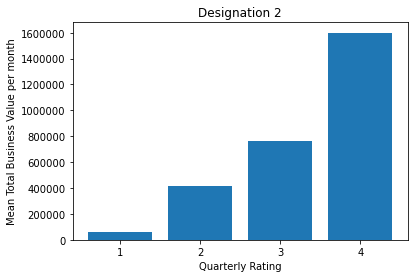

In [7]:
rating = range(1,5,1)
plt.bar(rating,d2_gr)
plt.xticks(d2_gr.index)
plt.ticklabel_format(style='plain')
plt.title('Designation 2')
plt.ylabel('Mean Total Business Value per month')
plt.xlabel('Quarterly Rating')
plt.show()

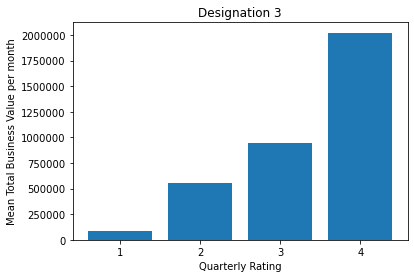

In [8]:
rating = range(1,5,1)
plt.bar(rating,d3_gr)
plt.xticks(d3_gr.index)
plt.ticklabel_format(style='plain')
plt.title('Designation 3')
plt.ylabel('Mean Total Business Value per month')
plt.xlabel('Quarterly Rating')

plt.show()

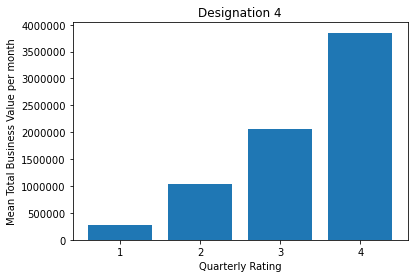

In [9]:
rating = range(1,5,1)
plt.bar(rating,d4_gr)
plt.xticks(d4_gr.index)
plt.ticklabel_format(style='plain')
plt.title('Designation 4')
plt.ylabel('Mean Total Business Value per month')
plt.xlabel('Quarterly Rating')
plt.show()

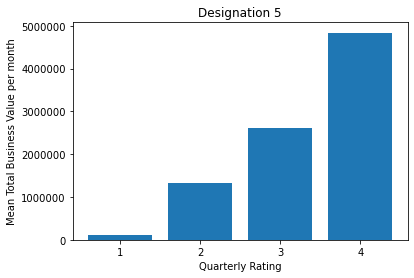

In [10]:
rating = range(1,5,1)
plt.bar(rating,d5_gr)
plt.xticks(d5_gr.index)
plt.ticklabel_format(style='plain')
plt.title('Designation 5')
plt.ylabel('Mean Total Business Value per month')
plt.xlabel('Quarterly Rating')
plt.show()

In [ ]:
# Findings: higher business value required for higher designations. Consistent (fair)
# 

In [11]:
# get salary information per designation
# one row per employee, show Salary mean for each employee

ind_des1_df = des1_df.groupby('Emp_ID')
d1_salary = ind_des1_df['Salary'].mean()

ind_des2_df = des2_df.groupby('Emp_ID')
d2_salary = ind_des2_df['Salary'].mean()

ind_des3_df = des3_df.groupby('Emp_ID')
d3_salary = ind_des3_df['Salary'].mean()

ind_des4_df = des4_df.groupby('Emp_ID')
d4_salary = ind_des4_df['Salary'].mean()

ind_des5_df = des5_df.groupby('Emp_ID')
d5_salary = ind_des5_df['Salary'].mean()

d1_salary


Emp_ID
1       57387
5       46368
11      42172
12      28116
17      51099
        ...  
2773    35607
2774    42313
2782    29582
2785    12105
2787    69498
Name: Salary, Length: 751, dtype: int64

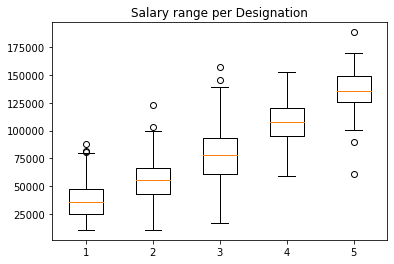

In [12]:
data = [d1_salary, d2_salary, d3_salary, d4_salary, d5_salary]
fig2,ax1 = plt.subplots()
ax1.set_title('Salary range per Designation')
ax1.boxplot(data)

plt.show()

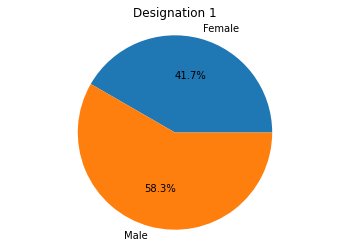

In [29]:
# gender % per designation pie charts

s_d1 = des1_df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
s_d1 = des1_df.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)

s_d2 = des2_df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
s_d2 = des2_df.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)

s_d3 = des3_df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
s_d3 = des3_df.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)

s_d4 = des4_df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
s_d4 = des4_df.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)

s_d5 = des5_df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
s_d5 = des5_df.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)

gen_d1 = s_d1.groupby('Gender').count()
gen_d2 = s_d2.groupby('Gender').count()
gen_d3 = s_d3.groupby('Gender').count()
gen_d4 = s_d4.groupby('Gender').count()
gen_d5 = s_d5.groupby('Gender').count()


#plot d1 pie chart 
labels = ['Female','Male']

# pie_1 = gen_d1.plot(kind='pie', y='Gender')
plt.pie(gen_d1['Emp_ID'], labels=labels, autopct="%1.1f%%")

plt.axis('equal')
plt.title('Designation 1')
plt.show()


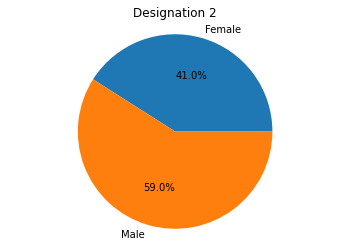

In [30]:
plt.pie(gen_d2['Emp_ID'], labels=labels, autopct="%1.1f%%")
plt.axis('equal')
plt.title('Designation 2')
plt.show()


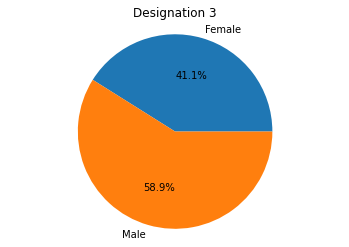

In [31]:
plt.pie(gen_d3['Emp_ID'], labels=labels, autopct="%1.1f%%")
plt.axis('equal')
plt.title('Designation 3')
plt.show()


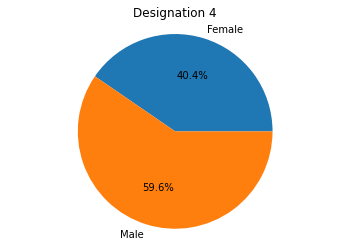

In [32]:
plt.pie(gen_d4['Emp_ID'], labels=labels, autopct="%1.1f%%")
plt.axis('equal')
plt.title('Designation 4')
plt.show()


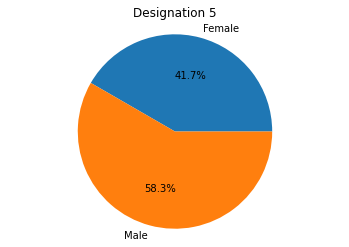

In [33]:
plt.pie(gen_d5['Emp_ID'],  labels=labels, autopct="%1.1f%%")
plt.axis('equal')
plt.title('Designation 5')
plt.show()


In [34]:
# Findings: Gender breakdown is almost identical at all designations

Gender
Female    37046
Male      35808
Name: Salary, dtype: int64
Gender
Female   37993.66
Male     36393.64
Name: Salary, dtype: float64


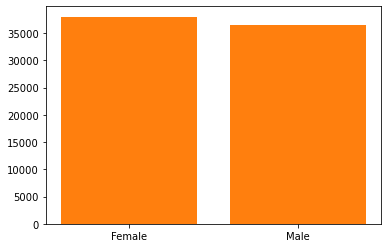

In [41]:
# Salary comparision by gender
genSal_d1 = s_d1.groupby('Gender')
print(genSal_d1['Salary'].median())
print(genSal_d1['Salary'].mean())
x = ['Female','Male']
fig, ax
plt.bar(x, genSal_d1['Salary'].median())
plt.bar(x, genSal_d1['Salary'].mean())
plt.show()

Gender
Female    55815
Male      55441
Name: Salary, dtype: int64
Gender
Female   55319.91
Male     55388.29
Name: Salary, dtype: float64


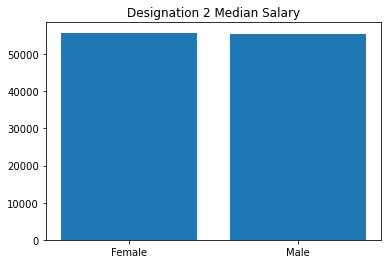

In [43]:
genSal_d2 = s_d2.groupby('Gender')
print(genSal_d2['Salary'].median())
print(genSal_d2['Salary'].mean())
x = ['Female','Male']
fig, ax
plt.bar(x, genSal_d2['Salary'].median())
plt.title('Designation 2 Median Salary')
plt.show()

Gender
Female    79700
Male      76525
Name: Salary, dtype: int64
Gender
Female   79681.39
Male     77192.90
Name: Salary, dtype: float64


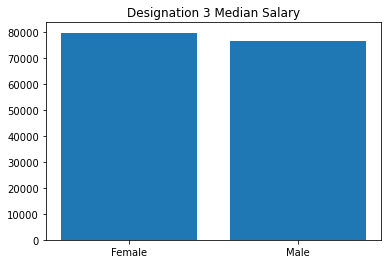

In [44]:
genSal_d3 = s_d3.groupby('Gender')
print(genSal_d3['Salary'].median())
print(genSal_d3['Salary'].mean())
x = ['Female','Male']
fig, ax
plt.bar(x, genSal_d3['Salary'].median())
plt.title('Designation 3 Median Salary')
plt.show()

Gender
Female    105686
Male      112217
Name: Salary, dtype: int64
Gender
Female   105837.86
Male     110855.24
Name: Salary, dtype: float64


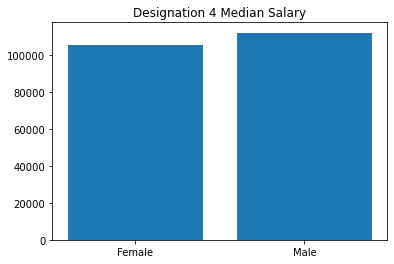

In [45]:
genSal_d4 = s_d4.groupby('Gender')
print(genSal_d4['Salary'].median())
print(genSal_d4['Salary'].mean())
x = ['Female','Male']
fig, ax
plt.bar(x, genSal_d4['Salary'].median())
plt.title('Designation 4 Median Salary')
plt.show()

Gender
Female   127824.00
Male     138094.50
Name: Salary, dtype: float64
Gender
Female   121381.20
Male     142762.00
Name: Salary, dtype: float64


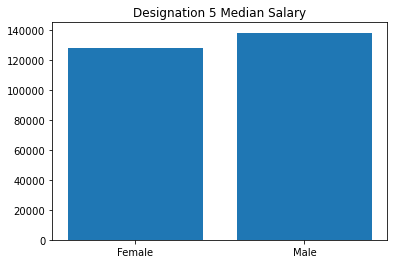

In [46]:
genSal_d5 = s_d5.groupby('Gender')
print(genSal_d5['Salary'].median())
print(genSal_d5['Salary'].mean())
x = ['Female','Male']
fig, ax
plt.bar(x, genSal_d5['Salary'].median())
plt.title('Designation 5 Median Salary')
plt.show()

In [51]:
# Findings: Salary similar for both genders across all levels. **Calculate %

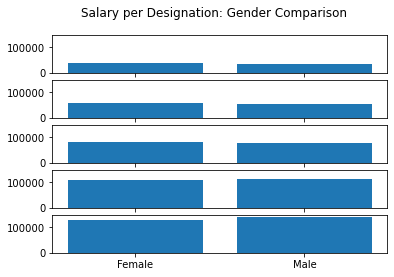

In [50]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharey=True)
fig.suptitle('Salary per Designation: Gender Comparison')
ax1.bar(x, genSal_d1['Salary'].median())
# ax1.title('Designation 1 Median Salary')

ax2.bar(x, genSal_d2['Salary'].median())
# ax2.title('Designation 2 Median Salary')

ax3.bar(x, genSal_d3['Salary'].median())
# ax3.title('Designation 3 Median Salary')

ax4.bar(x, genSal_d4['Salary'].median())
# ax4.title('Designation 4 Median Salary')

ax5.bar(x, genSal_d5['Salary'].median())
# ax5.title('Designation 5 Median Salary')
plt.show()
# not useful, use individual plots above

In [35]:
# ***FAIL CODE***
# # Make figure and axes
# fig, axs = plt.subplots(2, 2)

# # A standard pie plot
# axs[0, 0].pie(gen_d1, labels=labels, autopct='%1.1f%%')

# # Shift the second slice using explode
# axs[0, 1].pie(gen_d2, labels=labels, autopct='%.0f%%')

# axs[1, 0].pie(gen_d2, labels=labels, autopct='%.0f%%')

# # Adapt radius and text size for a smaller pie
# patches, texts, autotexts = axs[1, 0].pie(fracs, labels=labels,
#                                           autopct='%.0f%%',
#                                           textprops={'size': 'smaller'},
#                                           shadow=True, radius=0.5)
# # Make percent texts even smaller
# plt.setp(autotexts, size='x-small')
# autotexts[0].set_color('white')

# # Use a smaller explode and turn of the shadow for better visibility
# patches, texts, autotexts = axs[1, 1].pie(fracs, labels=labels,
#                                           autopct='%.0f%%',
#                                           textprops={'size': 'smaller'},
#                                           shadow=False, radius=0.5,
#                                           explode=(0, 0.05, 0, 0))
# plt.setp(autotexts, size='x-small')
# autotexts[0].set_color('white')

# plt.show()

In [52]:
# Compare Salary and Rating
# start with one employee, monthly data - use original dataframe. Manual selection to start. 
emp_info = df['Emp_ID'].value_counts()
# print(emp_info)
emp_2049 = df.loc[df['Emp_ID']==2049,:]
emp_2049

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
13725,2016-01-01,2049,39,Female,C23,Bachelor,100888,2011-10-24,NaN,1,3,2179960,3
13726,2016-02-01,2049,39,Female,C23,Bachelor,100888,2011-10-24,NaN,1,3,1713530,3
13727,2016-03-01,2049,39,Female,C23,Bachelor,100888,2011-10-24,NaN,1,3,4244770,3
13728,2016-04-01,2049,39,Female,C23,Bachelor,100888,2011-10-24,NaN,1,3,0,1
13729,2016-05-01,2049,39,Female,C23,Bachelor,100888,2011-10-24,NaN,1,3,0,1
13730,2016-06-01,2049,39,Female,C23,Bachelor,100888,2011-10-24,NaN,1,3,0,1
13731,2016-07-01,2049,39,Female,C23,Bachelor,100888,2011-10-24,NaN,1,3,0,4
13732,2016-08-01,2049,39,Female,C23,Bachelor,100888,2011-10-24,NaN,1,3,1939400,4
13733,2016-09-01,2049,39,Female,C23,Bachelor,100888,2011-10-24,NaN,1,3,1500000,4
13734,2016-10-01,2049,39,Female,C23,Bachelor,100888,2011-10-24,NaN,1,3,0,4


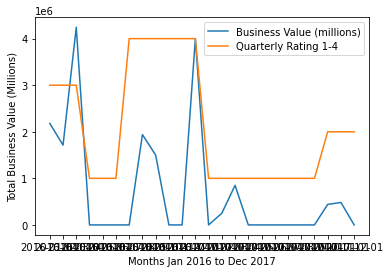

In [53]:
# plot time vs business value
# plot time vs rating
Fig_emp_2049 = plt.plot(emp_2049['MMM-YY'], emp_2049['Total Business Value'], label = 'Business Value (millions)')
rating = emp_2049['Quarterly Rating']*1000000
plt.plot(emp_2049['MMM-YY'], rating, label = 'Quarterly Rating 1-4')
plt.xlabel('Months Jan 2016 to Dec 2017')
plt.ylabel('Total Business Value (Millions)')
plt.legend()
plt.show()
# same problem with y values in scientific notation
# overlay quarterly rating
# set xticks with rotation
# Employee leaves in Dec 2017. How long was her rating at 1 before she left?

In [54]:
# Findings & notes on emp 2049
# joined 24 oct 2011 at designation 1.
# Jan 2016 (start of data set) designation 3
# Business value fluctuates between $4M and 0, with quarterly rating ranging from 4 to 1 to match
# 2017 - a year of poor ratings (9 months at 1, 3 months at 2) and low business value (8 months 0, remaining months under $1M)
# Last working day 14 Dec 2017

In [55]:
# find sample for designation change
emp_des = df.groupby('Emp_ID')['Designation'].nunique()
emp_des = emp_des.sort_values(ascending=False)
emp_des.head(45)
# 44 potential samples
emp_1031 = df.loc[df['Emp_ID']==1031,:]
# emp_1031

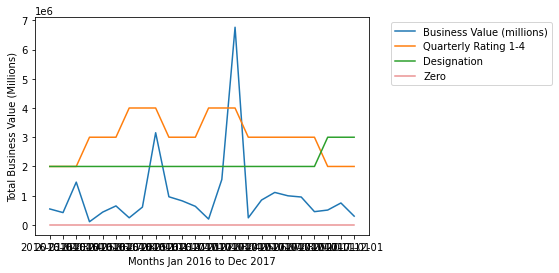

In [56]:
# Notes about sample 1031
# Employee joined Nov 2011 at designation 2. 
# Designation changed Oct 2017 from 2 to 3. Salary also increased from $62,213 to $68,434
# Business value for final quarter remains similar to previous quarters
# Rating final quarter dropped to 2
# Employee was still with the company final quarter


# Plot emp_1031



Fig_emp_1031 = plt.plot(emp_1031['MMM-YY'], emp_1031['Total Business Value'], label = 'Business Value (millions)')
rating = emp_1031['Quarterly Rating']*1000000
des = emp_1031['Designation']*1000000
zero = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.plot(emp_1031['MMM-YY'], rating, label = 'Quarterly Rating 1-4')
plt.plot(emp_1031['MMM-YY'], des, label = 'Designation')
plt.plot(emp_1031['MMM-YY'], zero, label = 'Zero', alpha=0.5)

plt.xlabel('Months Jan 2016 to Dec 2017')
plt.ylabel('Total Business Value (Millions)')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()
# when did designation change? Oct 2017

In [57]:
# Findings: harder to meet performance requirements at higher designations (based on this sample).
# Salary does increase with designation change

# generally good quarterly ratings (3 & 4)
# Business value always above 0. Values are moderate (1M) with 2 exceptions.
# Promotion to designation 3 after at least 21 months at D2 and 18 months high rating.
# It is possible that 1031 spent 5 years, 10 months at d2 before being promoted - we do not have access to data required.
# Last quarter (only quarter at D3), business value on par with previous performance and rating drops to 2.


In [58]:
# Find sample for salary change
emp_sal = df.groupby('Emp_ID')['Salary'].nunique()
emp_sal = emp_sal.sort_values(ascending=False)
emp_sal
emp_1877 = df.loc[df['Emp_ID']==1877,:]
emp_sal
# odd - joining designation 1 29/04/2016. Two days later her designation is 4. Error? 
# Oct 2017 - salary increase and designation change to 5. Last working date 28 Sep
# did she receive a promotion after 1 Sep 2017 and then quit?

Emp_ID
1031    2
1877    2
2390    2
2625    2
1783    2
       ..
1855    1
1854    1
1853    1
1851    1
1       1
Name: Salary, Length: 2381, dtype: int64

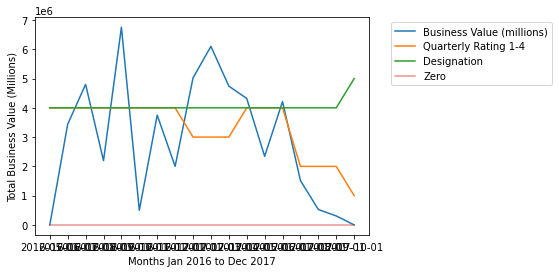

In [59]:
Fig_emp_1877 = plt.plot(emp_1877['MMM-YY'], emp_1877['Total Business Value'], label = 'Business Value (millions)')
rating = emp_1877['Quarterly Rating']*1000000
des = emp_1877['Designation']*1000000
zero = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.plot(emp_1877['MMM-YY'], rating, label = 'Quarterly Rating 1-4')
plt.plot(emp_1877['MMM-YY'], des, label = 'Designation')
plt.plot(emp_1877['MMM-YY'], zero, label = 'Zero', alpha=0.5)

plt.xlabel('Months Jan 2016 to Dec 2017')
plt.ylabel('Total Business Value (Millions)')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [60]:
# emp_2390
emp_2390 = df.loc[df['Emp_ID']==2390,:]
emp_2390

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
16075,2016-01-01,2390,44,Male,C28,College,46244,2015-05-30,NaN,1,1,820730,3
16076,2016-02-01,2390,45,Male,C28,College,46244,2015-05-30,NaN,1,1,572190,3
16077,2016-03-01,2390,45,Male,C28,College,46244,2015-05-30,NaN,1,1,1720550,3
16078,2016-04-01,2390,45,Male,C28,College,46244,2015-05-30,NaN,1,1,213110,4
16079,2016-05-01,2390,45,Male,C28,College,46244,2015-05-30,NaN,1,1,525530,4
16080,2016-06-01,2390,45,Male,C28,College,46244,2015-05-30,NaN,1,1,611890,4
16081,2016-07-01,2390,45,Male,C28,College,46244,2015-05-30,NaN,1,1,304740,4
16082,2016-08-01,2390,45,Male,C28,College,46244,2015-05-30,NaN,1,1,550690,4
16083,2016-09-01,2390,45,Male,C28,College,46244,2015-05-30,NaN,1,1,1200260,4
16084,2016-10-01,2390,45,Male,C28,College,46244,2015-05-30,NaN,1,1,3261460,4


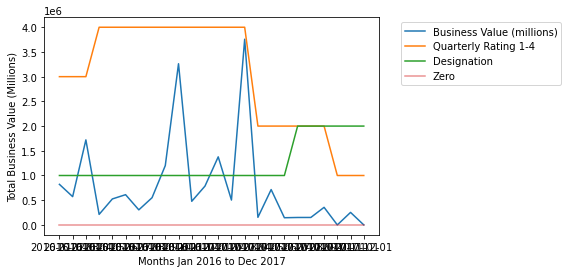

In [61]:
# plot sample 2390

Fig_emp_2390 = plt.plot(emp_2390['MMM-YY'], emp_2390['Total Business Value'], label = 'Business Value (millions)')
rating = emp_2390['Quarterly Rating']*1000000
des = emp_2390['Designation']*1000000
zero = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.plot(emp_2390['MMM-YY'], rating, label = 'Quarterly Rating 1-4')
plt.plot(emp_2390['MMM-YY'], des, label = 'Designation')
plt.plot(emp_2390['MMM-YY'], zero, label = 'Zero', alpha=0.5)

plt.xlabel('Months Jan 2016 to Dec 2017')
plt.ylabel('Total Business Value (Millions)')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [62]:
# Notes 2390
# joined 30 May 2015 at Designation 1. Still employed at Dec 2017
# 15 months of high ratings before designation change
# July 2017 designation change from 1 to 2 and salary increase from $46,244 to $51,383
#  Business value consistently above 0 until last quarter. Quarterly rating drops to 1.

# Findings: struggled to perform at higher designation.